In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve, GridSearchCV

# MAC0460/5832 - Lista 4: SVM - MNIST

### Data de Entrega: 23h55m do dia XX/07/2017

##### Classificação de dígitos
Os dataset para esta tarefa é uma adaptação do disponível na competição do kaggle de reconhecimento de dígitos (https://www.kaggle.com/c/digit-recognizer) e está disponível em http://vision.ime.usp.br/~caiomr/mac0460_5832/train_svm.csv.gz. O dataset está sob a licença Creative Commons Attribution-Share Alike 3.0 license (https://creativecommons.org/licenses/by-sa/3.0/). O dataset foi zipado, e apenas os dígitos 5 e 6 foram mantidos. Cada linha (amostra) do arquivo contém 257 colunas: a primeira informa o label da amostra (0 para o dígito 5, 1 para o dígito 6) e as outras 256 são os valores dos pixels da imagem (16 x 16) que representa o dígito.

Note que esse dataset difere do usado no EP3: as imagens sofreram pequenas rotações e translações aleatórias, além de terem sido escalonadas para o tamanho 16x16. Veja também que pode ser necessário realizar algum tipo de normalização para realizar um treinamento efetivo com SVM. Para auxiliar na normalização dos dados, consultem o seguinte link: http://scikit-learn.org/stable/modules/preprocessing.html. 

Q1. Use SVM para classificar os dígitos 5 e 6. Utilize as funções do scikit learn (http://scikit-learn.org/, http://scikit-learn.org/stable/modules/svm.html) para realizar o treinamento.

Teste os kernels linear e RBF da seguinte maneira:
1. Escolha aleatoriamente 932 amostras para formarem o conjunto de teste.
2. Com as 7000 amostras restantes, utilize validação cruzada (com número de folds K = 5) para escolher os parâmetros do seu classificador, isto é: C (peso da *soft margin*) para o kernel linear; C e gamma para o kernel RBF.
3. Plote a curva experimental de aprendizado para o melhor SVM com kernel linear e o melhor SVM com kernel RBF escolhidos por validação cruzada. Use as 932 amostras do conjunto de teste para estimar $E_{out}$. Comente sobre o resultado.

In [2]:
data = np.genfromtxt('data/train_svm.csv', delimiter=',')
print(data.shape)

(7932, 257)


Label:  1


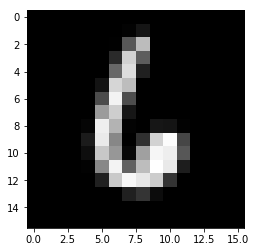

Label:  0


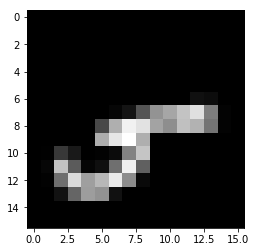

Label:  1


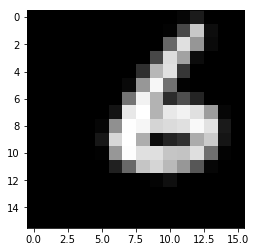

Label:  0


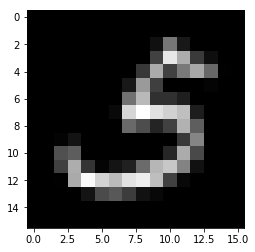

In [3]:
sample = data[0]
print("Label: ", int(sample[0]))
plt.imshow(sample[1:].reshape((16, 16)), cmap='gray')
plt.show()

sample = data[1]
print("Label: ", int(sample[0]))
plt.imshow(sample[1:].reshape((16, 16)), cmap='gray')
plt.show()

sample = data[20]
print("Label: ", int(sample[0]))
plt.imshow(sample[1:].reshape((16, 16)), cmap='gray')
plt.show()

sample = data[25]
print("Label: ", int(sample[0]))
plt.imshow(sample[1:].reshape((16, 16)), cmap='gray')
plt.show()

In [4]:
def plot_curve(estimator, data, label, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator, data, label, cv=5)
    plt.figure()
    plt.title(title)
    plt.ylim(ymin = -0.1, ymax = 0.1)
    plt.xlabel("Tamanho do conjunto de treinamento")
    plt.ylabel("Score")
    plt.plot(train_sizes, train_scores, color = 'r', label = "Score de treinamento")
    plt.plot(train_sizes, test_scores, color = 'b', label= 'Score de Teste')
    plt.show()

In [5]:
np.random.shuffle(data)
labels_t = np.zeros(data.shape[0])
labels_t[np.arange(data.shape[0])] = data[:, 0]

scaled_dataval  = StandardScaler().fit_transform(X = data[:, 1:])

In [6]:
##### Kernel Linear #####
C = {'C': [0.001, 0.01, 0.1, 1, 5]}
cls_lin = SVC(C = 1, kernel = 'linear')
clf_lin = GridSearchCV(cls_lin, C, cv = 5)
clf_lin.fit(scaled_dataval[932:, 1:], labels_t[932:])

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 5, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [7]:
x = clf_lin.best_estimator_.predict(scaled_dataval[:932, 1:])
eout_lin = np.sum(np.abs(x-labels_t[:932]))/932.0
print("Eout com kernel linear:",eout_lin, ". Melhor C escolhido por validacao cruzada: ",
      clf_lin.best_estimator_.C)

Eout com kernel linear: 0.0568669527897 . Melhor C escolhido por validacao cruzada:  0.01


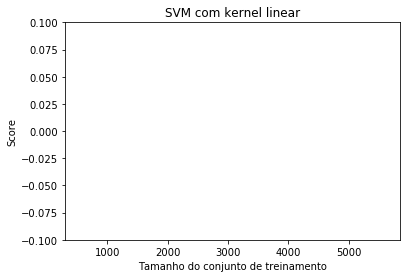

In [8]:
plot_curve(clf_lin, scaled_dataval[932:, 1:], labels_t[932:], "SVM com kernel linear")

In [ ]:
##### Kernel RBF #####
params = {'C' : [0.001, 0.01, 0.1, 1, 5], 'gamma' : np.logspace(-2, 0, 5)}
cls_rbf = SVC(C=1.0, kernel = 'rbf') 
clf_rbf = GridSearchCV(cls_rbf, params, cv = 5)
clf_rbf.fit(scaled_dataval[932:, 1:], labels_t[932:])

In [ ]:
x = clf_rbf.best_estimator_.predict(scaled_dataval[:932, 1:])
eout_rbf = np.sum((np.abs(x - labels_t[:932])))/932.0
print("Eout com kernel rbf:", eout_rbf, ". Melhores C e gamma escolhidos:",
      clf_rbf.best_estimator_.C, "e", clf_rbf.best_estimator_.gamma)

In [ ]:
plot_curve(clf_rbf, scaled_data[932:, 1:], labels_t[932:], "SVM com kernel rbf")